In [1]:
from sqlalchemy import extract, desc
import datetime
import time
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import options_estrategies as opt_est
from options_estrategies import Option_Due, InformationType
import models as model

In [2]:
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

estrategies = opt_est.options_estrategies(model, model.PETR4, model.PETR4_OPTIONS)

In [3]:
def convert_dict_from_update_ticks_to_dataframe(tick_data):
    df_tick_data = pd.DataFrame.from_dict(tick_data)
    df_tick_data = df_tick_data.drop(columns=['_sa_instance_state','timestamp_option','days_to_due_date'])
    df_tick_data['ratio'] = df_tick_data['last_tick'] - df_tick_data['last_tick'].shift(1)
    df_tick_data['buttefly_price'] = df_tick_data['last_tick'].shift(-1) - (2*df_tick_data['last_tick']) + df_tick_data['last_tick'].shift(1)
    
    df_tick_data = df_tick_data[
        ['option_name', 'strike', 'last_tick']
    ]      
    
    
    #df_tick_data = df_tick_data[['option_name', 'strike', 'bid', 'ask', 'last_tick','ratio','stock_price','deal_type_zone','updated_at']]      
    return df_tick_data


In [4]:
updated_ticks = estrategies.update_quotes(just_last_update=False,mode=InformationType.Offline)
ticks_to_process = updated_ticks[0]

options = []
for i in ticks_to_process:
    options.append(i.__dict__)



In [5]:
#dataframe_historical_ticks = convert_dict_from_update_ticks_to_dataframe(options)
tick_data = options

df_tick_data = pd.DataFrame.from_dict(tick_data)
df_tick_data = df_tick_data.set_index('updated_at')
df_tick_data = df_tick_data.between_time('10:15', '16:45')
df_tick_data = df_tick_data.reset_index()
df_tick_data = df_tick_data.drop(columns=['_sa_instance_state','timestamp_option','days_to_due_date'])
df_tick_data['ratio'] = df_tick_data['last_tick'] - df_tick_data['last_tick'].shift(1)

df_tick_data['cost_butterfly'] = round(df_tick_data['ask'].shift(1) - (2*df_tick_data['bid']) + df_tick_data['ask'].shift(-1),2)
df_tick_data['broken_wing'] = round(df_tick_data['strike'].shift(1) - (2*df_tick_data['strike']) + df_tick_data['strike'].shift(-1),2)

df_tick_data['cost_trava_alta'] = round(df_tick_data['ask'] - df_tick_data['bid'].shift(-1),2)

df_tick_data['anakha_1.3'] = round(df_tick_data['ask'] - (1.333 * df_tick_data['bid'].shift(-1)),2)
df_tick_data['anakha_1.3_pct_change'] = df_tick_data['anakha_1.3'].pct_change()

df_tick_data['anakha_1.2'] = round(df_tick_data['ask'] - (1.2 * df_tick_data['bid'].shift(-1)),2)
df_tick_data['anakha_1.2_pct_change'] = df_tick_data['anakha_1.2'].pct_change()

df_tick_data['anakha_1.34'] = round(df_tick_data['ask'] - (1.34 * df_tick_data['bid'].shift(-1)),2)
df_tick_data['anakha_1.34_pct_change'] = df_tick_data['anakha_1.34'].pct_change()

df_tick_data['anakha_1.35'] = round(df_tick_data['ask'] - (1.35 * df_tick_data['bid'].shift(-1)),2)
df_tick_data['anakha_1.35_pct_change'] = df_tick_data['anakha_1.35'].pct_change()


df_tick_data['anterior'] = round(df_tick_data['bid'].shift(1),2)
df_tick_data['centro'] = round(df_tick_data['bid'],2)
df_tick_data['posterior'] = round(df_tick_data['bid'].shift(-1),2)


df_tick_data = df_tick_data[
    ['updated_at','option_name', 'strike','deal_type_zone', 'bid','ask'
        ,'anakha_1.2','anakha_1.2_pct_change'
        ,'anakha_1.3','anakha_1.3_pct_change'
        ,'anakha_1.34','anakha_1.34_pct_change'
        ,'anakha_1.35','anakha_1.35_pct_change'
    ] # ,'ratio','cost_butterfly','broken_wing','cost_trava_alta']
]   

df_tick_data

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.2,anakha_1.2_pct_change,anakha_1.3,anakha_1.3_pct_change,anakha_1.34,anakha_1.34_pct_change,anakha_1.35,anakha_1.35_pct_change
0,2021-07-14 10:15:02.697,PETRH269,26.21,ITM,2.40,2.46,-0.22,NaN,-0.51,NaN,-0.53,NaN,-0.55,NaN
1,2021-07-14 10:15:02.697,PETRH254,26.46,ITM,2.23,2.28,-0.18,-0.181818,-0.45,-0.117647,-0.47,-0.113208,-0.49,-0.109091
2,2021-07-14 10:15:02.697,PETRH274,26.71,ITM,2.05,2.11,-0.13,-0.277778,-0.38,-0.155556,-0.40,-0.148936,-0.41,-0.163265
3,2021-07-14 10:15:02.697,PETRH276,26.96,ITM,1.87,1.94,-0.11,-0.153846,-0.34,-0.105263,-0.35,-0.125000,-0.37,-0.097561
4,2021-07-14 10:15:02.697,PETRH261,27.21,ITM,1.71,1.76,-0.14,0.272727,-0.35,0.029412,-0.36,0.028571,-0.37,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71713,2021-07-16 16:44:54.387,PETRH247,27.96,OTM,0.65,0.66,-0.02,-0.333333,-0.10,-0.166667,-0.10,-0.166667,-0.11,-0.153846
71714,2021-07-16 16:44:54.387,PETRH289,28.21,OTM,0.57,0.58,-0.02,0.000000,-0.09,-0.100000,-0.09,-0.100000,-0.10,-0.090909
71715,2021-07-16 16:44:54.387,PETRH279,28.46,OTM,0.50,0.51,-0.01,-0.500000,-0.06,-0.333333,-0.07,-0.222222,-0.07,-0.300000
71716,2021-07-16 16:44:54.387,PETRH294,28.71,OTM,0.43,0.44,-0.00,-1.000000,-0.05,-0.166667,-0.06,-0.142857,-0.06,-0.142857


,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.2,anakha_1.2_pct_change,anakha_1.3,anakha_1.3_pct_change,anakha_1.34,anakha_1.34_pct_change,anakha_1.35,anakha_1.35_pct_change
66990,2021-07-16 15:34:49.490,PETRH243,28.96,OTM,0.40,0.41,-0.01,-inf,-0.06,0.200000,-0.06,0.000000,-0.06,0.000000
38788,2021-07-15 15:07:49.850,PETRH264,25.71,ITM,1.90,2.21,-0.05,-inf,-0.30,0.200000,-0.31,0.148148,-0.33,0.178571
68384,2021-07-16 15:55:29.697,PETRH243,28.96,OTM,0.40,0.41,-0.01,-inf,-0.06,0.200000,-0.06,0.000000,-0.06,0.000000
58502,2021-07-16 13:30:01.470,PETRH229,25.96,ITM,1.81,1.99,-0.01,-1.250000,-0.24,0.200000,-0.25,0.136364,-0.26,0.130435
46624,2021-07-16 10:34:35.093,PETRH299,29.21,OTM,0.43,0.45,-0.01,-inf,-0.06,0.200000,-0.06,0.000000,-0.06,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42528,2021-07-15 16:04:26.017,PETRH246,25.46,ITM,2.11,2.40,0.11,-2.222222,-0.15,-0.594595,-0.16,-0.589744,-0.18,-0.560976
42698,2021-07-15 16:06:57.227,PETRH246,25.46,ITM,2.11,2.40,0.11,-2.222222,-0.15,-0.594595,-0.16,-0.589744,-0.18,-0.560976
42715,2021-07-15 16:07:12.350,PETRH246,25.46,ITM,2.11,2.40,0.11,-2.222222,-0.15,-0.594595,-0.16,-0.589744,-0.18,-0.560976
42511,2021-07-15 16:04:10.900,PETRH246,25.46,ITM,2.11,2.40,0.11,-2.222222,-0.15,-0.594595,-0.16,-0.589744,-0.18,-0.560976


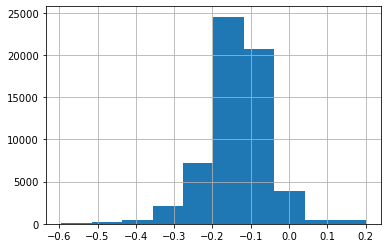

In [6]:
orderned = df_tick_data.sort_values(by='anakha_1.3_pct_change', ascending=False).copy()

orderned = orderned[(orderned['anakha_1.3_pct_change'] < 0.20) & (orderned['anakha_1.3_pct_change'] > -0.60)]

orderned['anakha_1.3_pct_change'].hist()
orderned

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.2,anakha_1.2_pct_change,anakha_1.3,anakha_1.3_pct_change,anakha_1.34,anakha_1.34_pct_change,anakha_1.35,anakha_1.35_pct_change
30417,2021-07-15 11:12:01.383,PETRH229,25.96,ITM,2.21,2.24,-0.23,0.916667,-0.51,0.214286,-0.52,0.209302,-0.54,0.200000
41441,2021-07-15 15:48:48.547,PETRH229,25.96,ITM,1.86,1.87,-0.17,0.888889,-0.40,0.176471,-0.41,0.171429,-0.42,0.135135
27641,2021-07-15 10:31:10.717,PETRH254,26.46,ITM,1.82,1.92,-0.17,0.888889,-0.40,0.176471,-0.41,0.171429,-0.43,0.162162
41717,2021-07-15 15:52:50.497,PETRH229,25.96,ITM,1.83,1.86,-0.17,0.888889,-0.39,0.181818,-0.40,0.176471,-0.42,0.166667
41699,2021-07-15 15:52:35.377,PETRH229,25.96,ITM,1.83,1.86,-0.17,0.888889,-0.39,0.181818,-0.40,0.176471,-0.42,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43438,2021-07-15 16:17:47.543,PETRH264,25.71,ITM,1.88,2.09,-0.11,-1.916667,-0.35,1.692308,-0.36,1.571429,-0.38,1.375000
43421,2021-07-15 16:17:32.417,PETRH264,25.71,ITM,1.88,2.09,-0.11,-1.916667,-0.35,1.692308,-0.36,1.571429,-0.38,1.375000
54898,2021-07-16 12:36:35.927,PETRH229,25.96,ITM,1.72,1.90,-0.14,-1.933333,-0.37,3.625000,-0.38,3.222222,-0.40,2.636364
37614,2021-07-15 14:50:26.217,PETRH264,25.71,ITM,2.02,2.19,-0.14,-1.933333,-0.40,2.333333,-0.41,1.928571,-0.43,1.687500


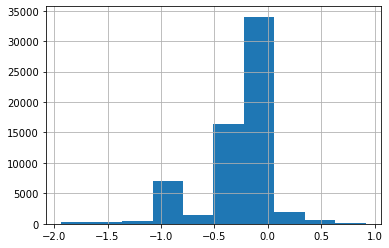

In [7]:
orderned = df_tick_data.sort_values(by='anakha_1.2_pct_change', ascending=False).copy()

orderned = orderned[(orderned['anakha_1.2_pct_change'] < 1) & (orderned['anakha_1.2_pct_change'] > -2)]

orderned['anakha_1.2_pct_change'].hist()
orderned



<Figure size 576x648 with 0 Axes>

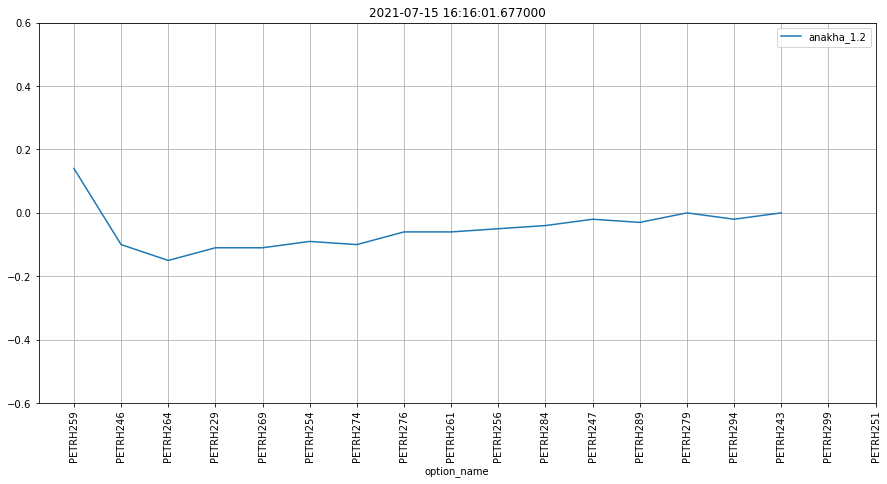

<Figure size 576x648 with 0 Axes>

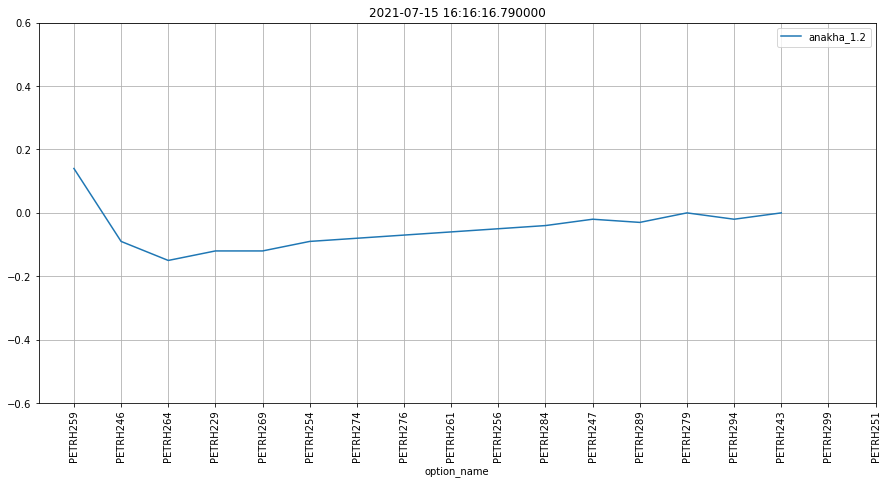

<Figure size 576x648 with 0 Axes>

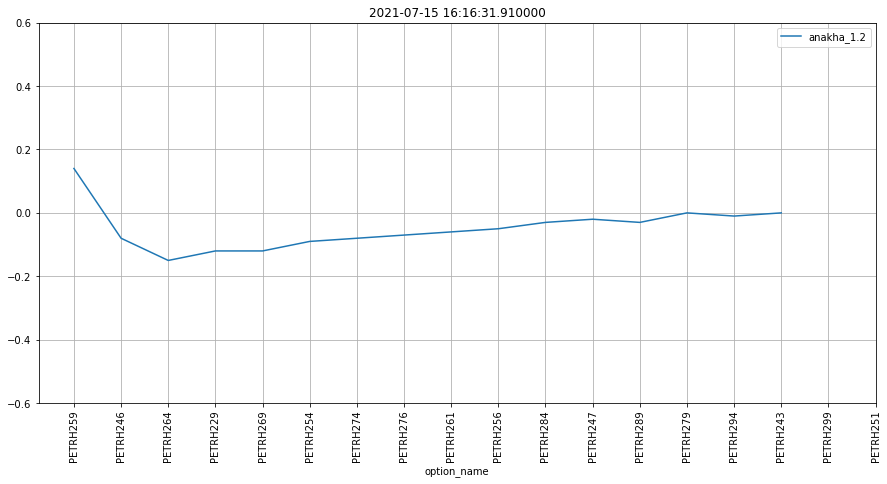

<Figure size 576x648 with 0 Axes>

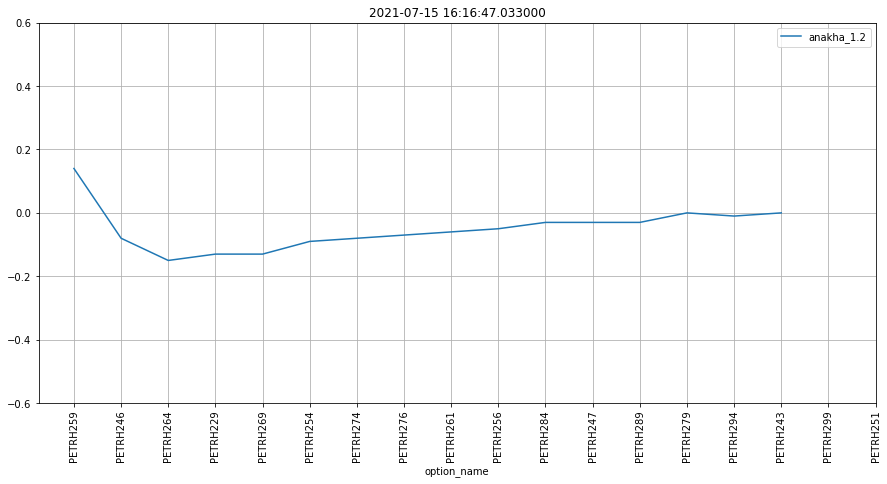

<Figure size 576x648 with 0 Axes>

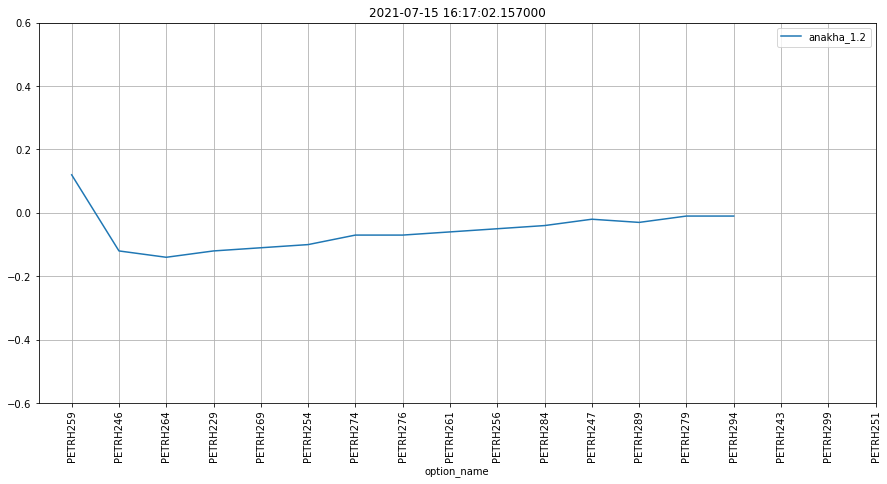

<Figure size 576x648 with 0 Axes>

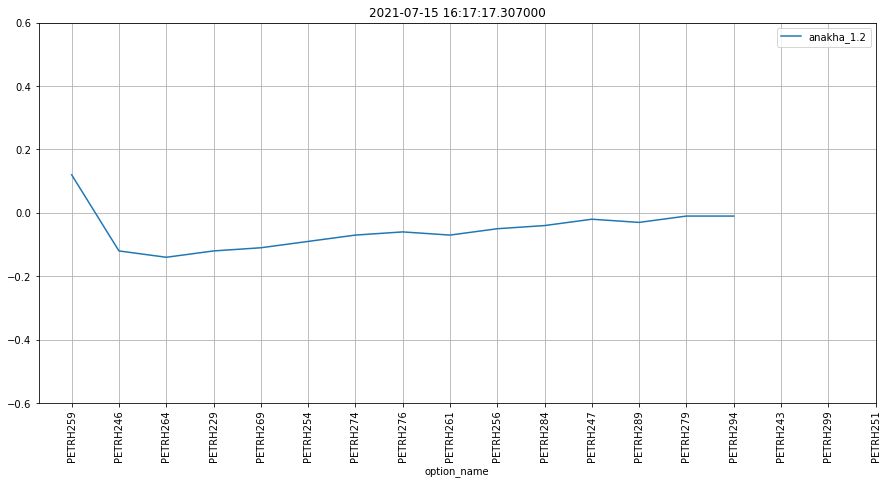

<Figure size 576x648 with 0 Axes>

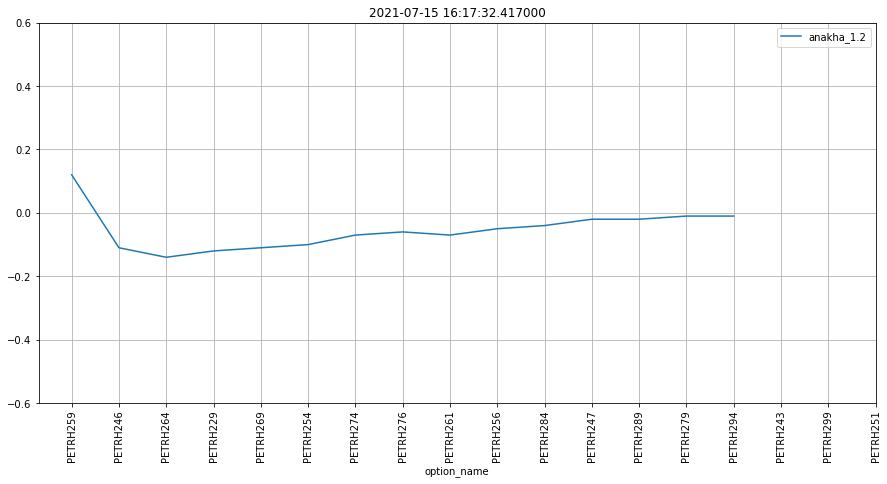

<Figure size 576x648 with 0 Axes>

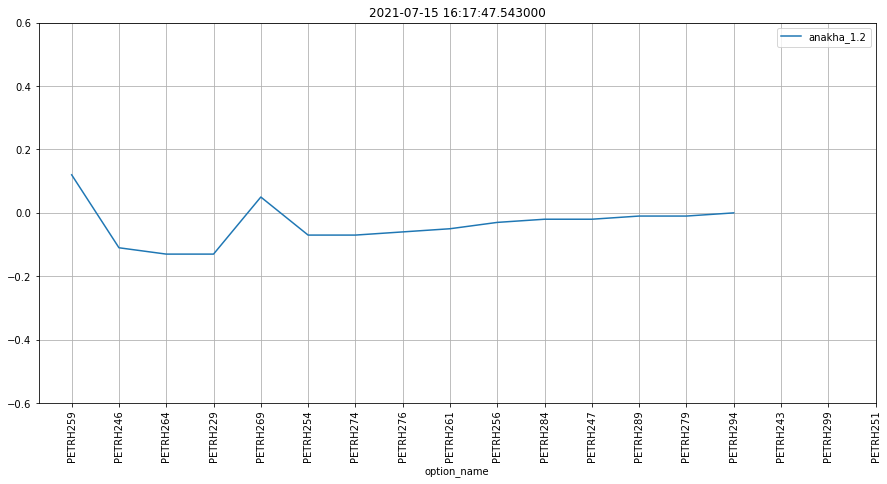

<Figure size 576x648 with 0 Axes>

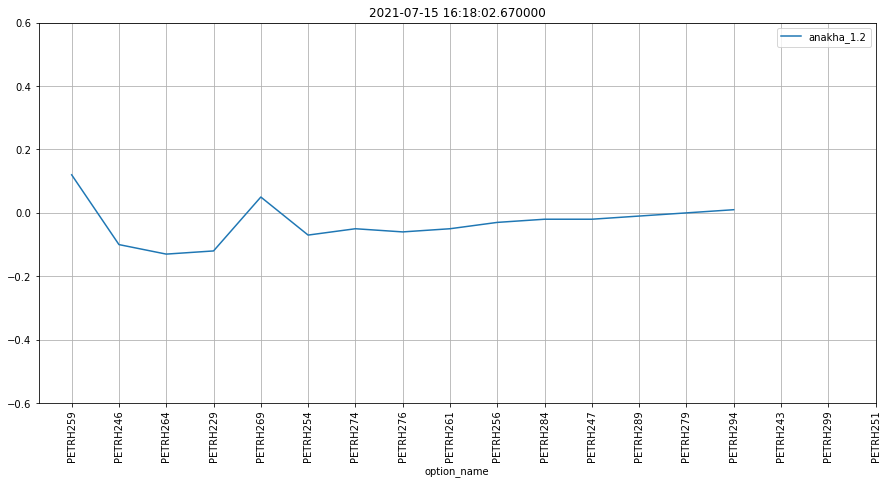

<Figure size 576x648 with 0 Axes>

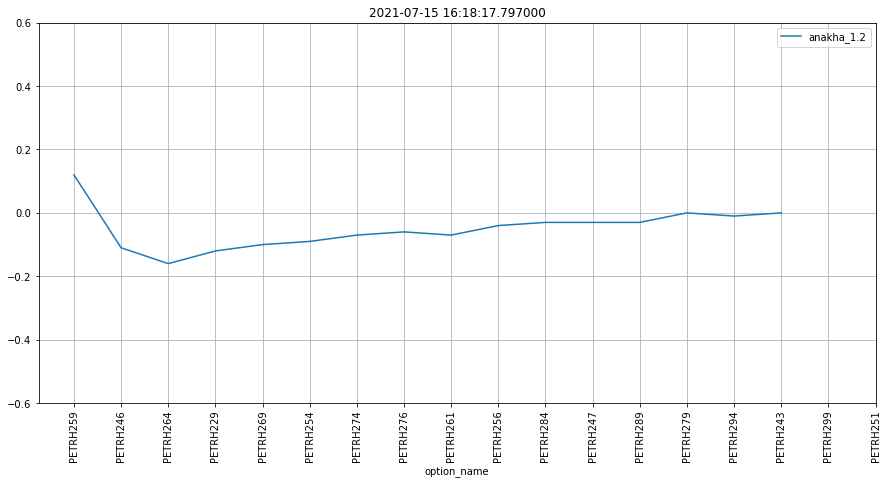

<Figure size 576x648 with 0 Axes>

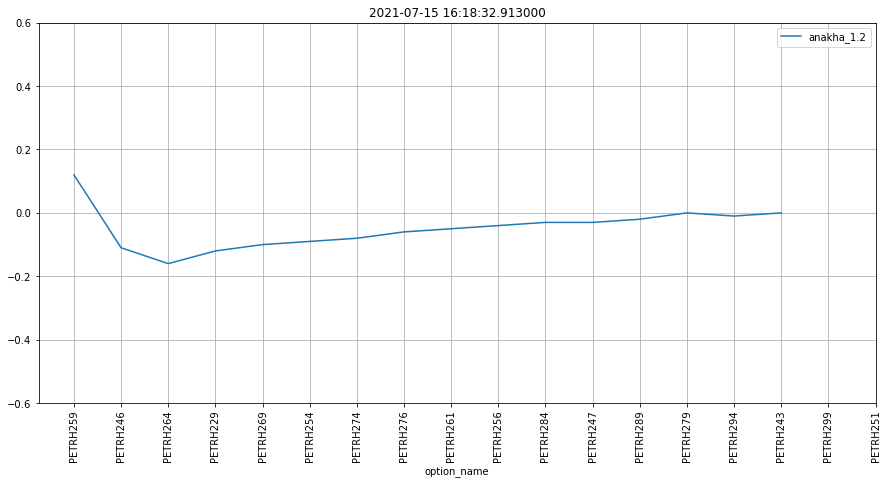

<Figure size 576x648 with 0 Axes>

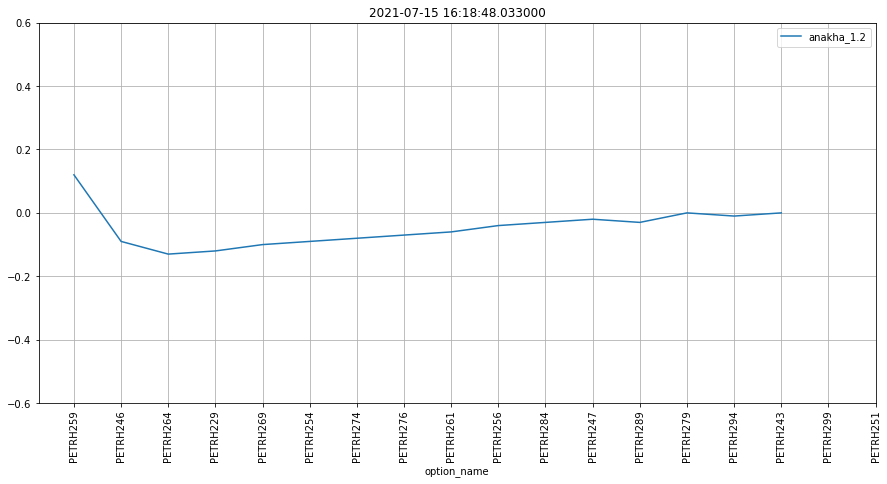

In [8]:
datetime_ticks = df_tick_data[(df_tick_data['updated_at'] > '2021-07-15 00:00:01') & (df_tick_data['updated_at'] <'2021-07-15 23:59:59')]
datetime_ticks = datetime_ticks.set_index('updated_at')
datetime_ticks = datetime_ticks.between_time('16:16', '16:19')

upload_datetime = datetime_ticks.index.unique()
unique_options = datetime_ticks['option_name'].unique()

anakha_param = 'anakha_1.2'
#2021-07-16 16:37:35.730
#PETRH243

for itm in upload_datetime:
    plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == itm)]
    title = plot_dataframe.iloc[0]['updated_at']
    plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]
    plt.figure(figsize=(8,9))
    
    ax = plot_dataframe.plot(title=title, x="option_name", y=[anakha_param],figsize=(15,7),ylim=(-0.60,0.60),grid=True)

    unique_options = datetime_ticks['option_name'].unique()
    options_name = list(unique_options)
    plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')


    plt.show()
    plot_dataframe

In [9]:
len(datetime_ticks['option_name'].unique())

18

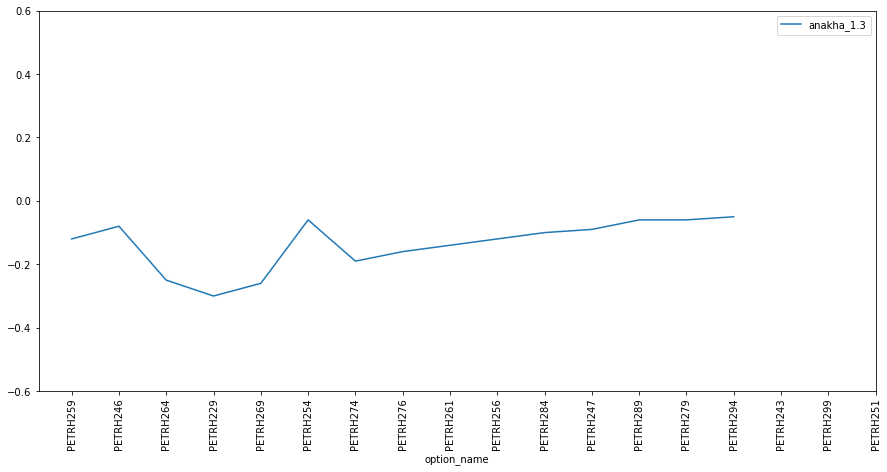

,updated_at,option_name,strike,deal_type_zone,bid,ask,anakha_1.2,anakha_1.2_pct_change,anakha_1.3,anakha_1.3_pct_change,anakha_1.34,anakha_1.34_pct_change,anakha_1.35,anakha_1.35_pct_change
53723,2021-07-16 12:19:12.723,PETRH246,25.46,ITM,1.99,2.33,0.12,-0.250000,-0.12,0.200000,-0.14,0.166667,-0.15,0.071429
53724,2021-07-16 12:19:12.723,PETRH264,25.71,ITM,1.84,2.09,0.13,0.083333,-0.08,-0.333333,-0.09,-0.357143,-0.11,-0.266667
53725,2021-07-16 12:19:12.723,PETRH229,25.96,ITM,1.63,1.91,-0.03,-1.230769,-0.25,2.125000,-0.26,1.888889,-0.28,1.545455
53726,2021-07-16 12:19:12.723,PETRH269,26.21,ITM,1.62,1.66,-0.10,2.333333,-0.30,0.200000,-0.31,0.192308,-0.32,0.142857
53727,2021-07-16 12:19:12.723,PETRH254,26.46,ITM,1.47,1.50,-0.08,-0.200000,-0.26,-0.133333,-0.27,-0.129032,-0.28,-0.125000
53728,2021-07-16 12:19:12.723,PETRH274,26.71,ITM,1.32,1.35,0.08,-2.000000,-0.06,-0.769231,-0.07,-0.740741,-0.08,-0.714286
53729,2021-07-16 12:19:12.723,PETRH261,27.21,OTM,1.06,1.08,-0.06,-1.750000,-0.19,2.166667,-0.19,1.714286,-0.20,1.500000
53730,2021-07-16 12:19:12.723,PETRH256,27.46,OTM,0.95,0.96,-0.05,-0.166667,-0.16,-0.157895,-0.17,-0.105263,-0.17,-0.150000
53731,2021-07-16 12:19:12.723,PETRH284,27.71,OTM,0.84,0.85,-0.04,-0.200000,-0.14,-0.125000,-0.14,-0.176471,-0.15,-0.117647
53732,2021-07-16 12:19:12.723,PETRH247,27.96,OTM,0.74,0.75,-0.03,-0.250000,-0.12,-0.142857,-0.12,-0.142857,-0.13,-0.133333


In [10]:
plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == '2021-07-16 12:19:12.723')]
plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]
ax = plot_dataframe.plot(x="option_name", y=["anakha_1.3"],figsize=(15,7),ylim=(-0.60,0.60),x_compat=True)

unique_options = datetime_ticks['option_name'].unique()
options_name = list(unique_options)
plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')


plt.show()
plot_dataframe

In [ ]:
plot_dataframe['var'] = plot_dataframe['anakha_1.3'].pct_change()
plot_dataframe

In [ ]:
df_tick_data[(df_tick_data['updated_at'] == '2021-07-16 16:44:39.263')]

In [ ]:
dataframe_analise = []
filtered_dataframe = df_tick_data[(df_tick_data['cost_trava_alta'] <0.06) & (df_tick_data['broken_wing'] == 0)]
filtered_dataframe_otm = df_tick_data[(df_tick_data['broken_wing'] == 0)].groupby(by='deal_type_zone').mean()

filtered_dataframe_otm

for i,v in filtered_dataframe.iterrows():
    data_ratio = df_tick_data[i:i+2].copy()
    data_ratio.insert(0, 'operation', ['C','V'])
    dataframe_analise.append(data_ratio)

    
#df_tick_data[(df_tick_data['trava_alta'] <0.01)]
dataframe_analise

In [ ]:
ratio_statistic_finder = dataframe_historical_ticks[['updated_at','option_name','ratio']]
ratio_statistic_finder = ratio_statistic_finder.set_index('updated_at')
ratio_statistic_finder = ratio_statistic_finder.between_time('10:10', '17:00')
ratio_statistic_finder = ratio_statistic_finder.reset_index()
ratio_statistic_finder = ratio_statistic_finder.pivot(index='updated_at', columns='option_name', values='ratio')
ratio_statistic_finder = ratio_statistic_finder.dropna(axis=1)
ratio_statistic_finder

ratio_statistic_data = {}
for (column, value) in ratio_statistic_finder.iteritems():
    ratio_statistic_data.update({ column: { "Mean": ratio_statistic_finder[column].mean(), "StdDev": ratio_statistic_finder[column].std(), "2xStdDev": (ratio_statistic_finder[column].std()*2)  }}) 

ratio_statistic_dataframe = pd.DataFrame.from_dict(ratio_statistic_data)
ratio_statistic_dataframe = ratio_statistic_dataframe.transpose()
ratio_statistic_dataframe

In [11]:

updated_ticks = estrategies.update_quotes(just_last_update=True,mode=InformationType.Real_Time)
ticks_to_process = updated_ticks[0]
options_updated = []
for i in ticks_to_process:
    options_updated.append(i.__dict__)

df_options_updated = convert_dict_from_update_ticks_to_dataframe(options_updated)
df_options_updated.reset_index()
df_options_updated = df_options_updated.set_index('option_name')
df_options_updated = pd.merge(df_options_updated, ratio_statistic_dataframe, left_index=True, right_index=True)

df_options_updated['above_mean'] = abs(df_options_updated['ratio']) > abs(df_options_updated['Mean'])
df_options_updated['above_2x_std_dev'] = abs(df_options_updated['ratio']) > abs(abs(df_options_updated['Mean']) + df_options_updated['2xStdDev'])
df_options_updated['a2xStdDev_Price'] = abs(abs(df_options_updated['Mean']) + df_options_updated['2xStdDev'])
df_options_updated = df_options_updated.drop(columns=['updated_at','StdDev','2xStdDev'])
df_options_updated

NameError: name 'ratio_statistic_dataframe' is not defined

In [18]:
estrategies = opt_est.options_estrategies(model, model.PETR4, model.PETR4_OPTIONS)
df_tick_data = estrategies.anakha13_spiral(just_last_update=False, mode=InformationType.Offline)

anakha_param = 'anakha_1.2'

df_tick_data = df_tick_data[(df_tick_data[anakha_param + '_pct_change'] < 0.20) & (df_tick_data[anakha_param + '_pct_change'] > -0.60)]
df_tick_data = df_tick_data.sort_values(by=anakha_param + '_pct_change', ascending=False).copy()

datetime_ticks = df_tick_data 
datetime_ticks = datetime_ticks.set_index('updated_at')

datetime_ticks = datetime_ticks.sort_values(by='updated_at')
upload_datetime = datetime_ticks.index.unique()
upload_datetime
#unique_options = datetime_ticks['option_name'].unique()


DatetimeIndex(['2021-07-14 10:15:02.697000', '2021-07-14 10:15:17.807000',
               '2021-07-14 10:15:32.920000', '2021-07-14 10:15:48.040000',
               '2021-07-14 10:16:03.143000', '2021-07-14 10:16:18.270000',
               '2021-07-14 10:16:33.393000', '2021-07-14 10:16:48.510000',
               '2021-07-14 10:17:03.630000', '2021-07-14 10:17:18.740000',
               ...
               '2021-07-16 16:42:38.247000', '2021-07-16 16:42:53.380000',
               '2021-07-16 16:43:08.503000', '2021-07-16 16:43:23.623000',
               '2021-07-16 16:43:38.747000', '2021-07-16 16:43:53.870000',
               '2021-07-16 16:44:08.997000', '2021-07-16 16:44:24.137000',
               '2021-07-16 16:44:39.263000', '2021-07-16 16:44:54.387000'],
              dtype='datetime64[ns]', name='updated_at', length=4191, freq=None)

In [19]:

unique_options
upload_datetime
#datetime_ticks

DatetimeIndex(['2021-07-14 10:15:02.697000', '2021-07-14 10:15:17.807000',
               '2021-07-14 10:15:32.920000', '2021-07-14 10:15:48.040000',
               '2021-07-14 10:16:03.143000', '2021-07-14 10:16:18.270000',
               '2021-07-14 10:16:33.393000', '2021-07-14 10:16:48.510000',
               '2021-07-14 10:17:03.630000', '2021-07-14 10:17:18.740000',
               ...
               '2021-07-16 16:42:38.247000', '2021-07-16 16:42:53.380000',
               '2021-07-16 16:43:08.503000', '2021-07-16 16:43:23.623000',
               '2021-07-16 16:43:38.747000', '2021-07-16 16:43:53.870000',
               '2021-07-16 16:44:08.997000', '2021-07-16 16:44:24.137000',
               '2021-07-16 16:44:39.263000', '2021-07-16 16:44:54.387000'],
              dtype='datetime64[ns]', name='updated_at', length=4191, freq=None)

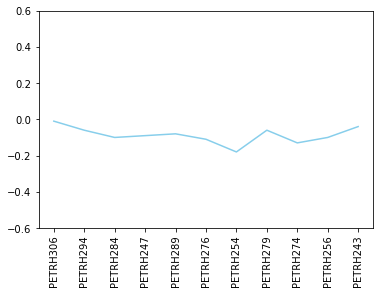

<Figure size 432x288 with 0 Axes>

In [26]:

plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == '2021-07-14 10:15:02.697000')]

title = plot_dataframe.iloc[0]['updated_at']
plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]
unique_options = plot_dataframe['option_name'].unique()

options_name = list(unique_options)
y = list(plot_dataframe[anakha_param])

plt.plot(options_name,y, color='skyblue')
plt.ylim(-0.60,0.60)
plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')

plt.draw()
plt.pause(1)
plt.clf()


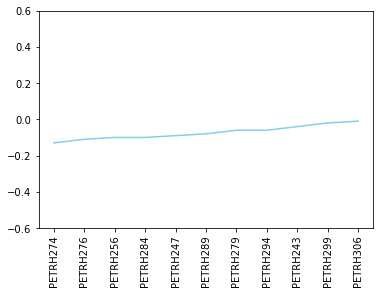

<Figure size 432x288 with 0 Axes>

In [27]:
plot_dataframe = df_tick_data[(df_tick_data['updated_at'] == '2021-07-14 10:15:02.697000')]
plot_dataframe = plot_dataframe.sort_values(by='strike')

title = plot_dataframe.iloc[0]['updated_at']
plot_dataframe = plot_dataframe[1:len(plot_dataframe)-1]

unique_options = plot_dataframe['option_name'].unique()
options_name = list(unique_options)
y = list(plot_dataframe[anakha_param])

plt.plot(options_name,y, color='skyblue')
plt.ylim(-0.60,0.60)
plt.xticks(range(0,len(options_name)), options_name, rotation='vertical')

plt.draw()
plt.pause(1)
plt.clf()

In [22]:
len(options_name)

11

In [ ]:
['PETRH254', 'PETRH274', 'PETRH276', 'PETRH256', 'PETRH284', 'PETRH247', 'PETRH289'
 , 'PETRH279', 'PETRH294', 'PETRH243', 'PETRH299', 'PETRH306', 'PETRH309']